In [12]:
import numpy
import pygad

### Importowanie bibliotek: numpy i pygad

In [13]:
przedmioty = [
    "zegar", 
    "obraz-pejzaż", 
    "obraz-portret",
    "radio",
    "laptop",
    "lampka nocna",
    "srebrne sztućce",
    "porcelana",
    "figura z brązu",
    "skórzana torebka",
    "odkurzacz"
]
ceny = [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300]
wagi = [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]

### Zdefiniowanie tablic kolejno: nazw przedmiotów; ich cen i ich wag

In [14]:
gene_space = [0,1]
num_genes = len(przedmioty)
sol_per_pop = 10
num_generations = 30
num_parents_mating = 5
keep_parents = 2
parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_percent_genes = 10

### Zdefiniowanie parametrów algorytmu genetycznego
- gene_space: przestrzeń możliwych genów (0 nie biorę, 1 biorę)
- num_genes: długość chromosomu (tutaj 11)
- sol_per_pop: liczba chromosomów w populacji (tutaj 10)
- num_generations: liczba pokoleń (tutaj 30)
- num_parents_mating: liczba rodziców do rozmnożenia (tutaj 5)
- keep_parents: liczba rodziców przeżywających do następnego pokolenia (tutaj 2)
- parent_selection_type: typ selekcji (tutaj selekcja stabilnego stanu)
- crossover_type: typ krzyżowania (tutaj jednopunktowe)
- mutation_type: typ mutacji (tutaj random)
- mutation_percent_genes: prawdopodobieństwo mutacji (tutaj 10%)

In [15]:
def fitness_func(solution, solution_idx):
    waga = numpy.sum(wagi * solution)
    fitness = 0
    if waga > 25:
        return fitness
    else:
        fitness = numpy.sum(ceny*solution)
        return fitness
fitness_function = fitness_func

### Zdefiniowanie funkcji fitness
"fitness" chromosomu obliczam sprawdzając czy waga przedmiotów, na które on wskazuje jest większa niż 25. Jeżeli tak to ustawiony zostanie mu fitness 0, ponieważ jest nieprzydatny. W przeciwnym wypadku obliczam dla niego sumę cen wskazywanych przedmiotów.

In [16]:
ga_instance = pygad.GA(gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_function,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type=parent_selection_type,
    keep_parents=keep_parents,
    crossover_type=crossover_type,
    mutation_type=mutation_type,
    mutation_percent_genes=mutation_percent_genes
)

### Zdefiniowanie obiektu ga_instance i konfiguracja algorytmu genetycznego

In [17]:
ga_instance.run()

### Uruchomienie algorytmu

In [18]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
do_ukradzenia = []
for idx,i in enumerate(solution):
    if i == 1:
        do_ukradzenia.append({
            "przedmiot": przedmioty[idx],
            "wartość": ceny[idx],
            "waga": wagi[idx]
        })
for i in do_ukradzenia:
    print(i)

{'przedmiot': 'obraz-pejzaż', 'wartość': 300, 'waga': 7}
{'przedmiot': 'obraz-portret', 'wartość': 200, 'waga': 6}
{'przedmiot': 'laptop', 'wartość': 500, 'waga': 5}
{'przedmiot': 'porcelana', 'wartość': 250, 'waga': 3}
{'przedmiot': 'skórzana torebka', 'wartość': 280, 'waga': 3}


### Wynik
Wynikiem jest lista obiektów zawierających nazwę przedmiotu, jego wartość i wagę.

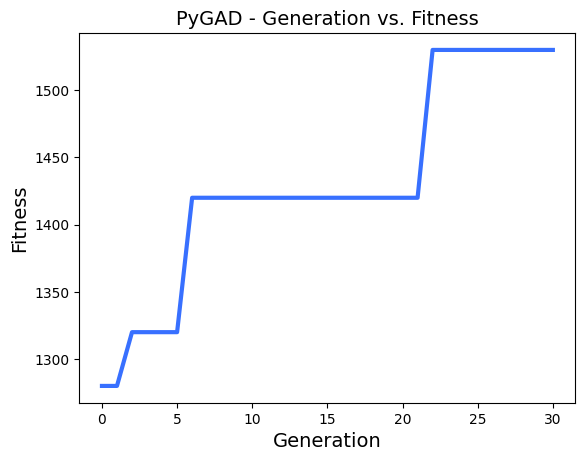

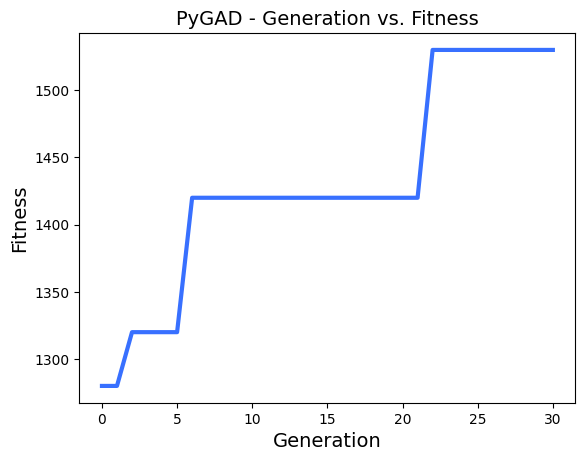

In [19]:
ga_instance.plot_fitness()

### Wykres obrazujący przebieg ewolucji rozwiązań